<a href="https://colab.research.google.com/github/TranNhatHan/FinalProjectSubjectRPrograming/blob/main/TrucQuanHoaDuLieuVoiR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Truy cập vào các thư viện cần thiết

In [ ]:
# install.packages("ggplot2")
# install.packages("plotrix")
# install.packages("pheatmap")
# install.packages("fmsb")
# install.packages("dplyr")
library(pheatmap)  
library(scales)
library(plotrix)
library(ggplot2)
library(fmsb)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘plotrix’


The following object is masked from ‘package:scales’:

    rescale



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#Xử lí dữ liệu

Đọc dữ liệu vào R

In [ ]:
#Đọc dữ liệu
df = read.csv("https://raw.githubusercontent.com/TranNhatHan/FinalProjectSubjectRPrograming/main/DataVisualization/GDP_VN.csv?token=GHSAT0AAAAAABR2RLMF5F6WLD3MJUD5G5ZGYTZCIZQ")
df

Year,Total.GDP,GDP.PC,GDP.PCF,GCF,FC,EGS,IGS
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,441646,5689.00,402.00,130771,321853,243049,253927
2001,481295,6117.00,NA,150033,342607,262846,273828
2002,535762,6720.00,440.00,177983,382137,304262,331946
2003,1809149,19278.00,1064.00,632326,1206819,1132688,1304350
2004,2157828,24818.00,1273.00,770211,1565602,1553687,1730902
2005,2779880,31640.00,1517.00,827032,2008700,2206971,2321858
2006,3245419,36544.00,1748.00,884160,2285623,2597264,2483567
2007,3584262,39932.00,1907.00,956124,2566803,2997380,2920030
2008,3937856,43402.00,2052.00,1056632,2838048,3402495,3273530


In [ ]:
str(df)

'data.frame':	15 obs. of  8 variables:
 $ Year     : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Total.GDP: num  441646 481295 535762 1809149 2157828 ...
 $ GDP.PC   : num  5689 6117 6720 19278 24818 ...
 $ GDP.PCF  : num  402 NA 440 1064 1273 ...
 $ GCF      : num  130771 150033 177983 632326 770211 ...
 $ FC       : num  321853 342607 382137 1206819 1565602 ...
 $ EGS      : num  243049 262846 304262 1132688 1553687 ...
 $ IGS      : num  253927 273828 331946 1304350 1730902 ...


Xử lí dữ liệu bị thiếu

In [ ]:
symnum(cor(df, use = "complete.obs"))

          Y T GDP.PC GDP.PCF GC F E I
Year      1                          
Total.GDP B 1                        
GDP.PC    B B 1                      
GDP.PCF   B B B      1               
GCF       B B B      B       1       
FC        B B B      B       B  1    
EGS       B B B      B       B  B 1  
IGS       B B B      B       B  B B 1
attr(,"legend")
[1] 0 ‘ ’ 0.3 ‘.’ 0.6 ‘,’ 0.8 ‘+’ 0.9 ‘*’ 0.95 ‘B’ 1

In [ ]:
lm(GDP.PCF ~ Total.GDP + GDP.PC + GCF + FC + EGS + IGS, df)
df$GDP.PCF[2] = round(1.352e+02 + 
  1.797e-04*df$Total.GDP[2] + 
  4.360e-02*df$GDP.PC[2] + 
  1.345e-04*df$GCF[2] + 
  -1.661e-04*df$FC[2] + 
  -4.174e-05*df$EGS[2] +
  -6.834e-05*df$IGS[2])


Call:
lm(formula = GDP.PCF ~ Total.GDP + GDP.PC + GCF + FC + EGS + 
    IGS, data = df)

Coefficients:
(Intercept)    Total.GDP       GDP.PC          GCF           FC          EGS  
  1.352e+02    1.797e-04    4.360e-02    1.345e-04   -1.661e-04   -4.177e-05  
        IGS  
 -6.831e-05  


#Biểu đồ thanh

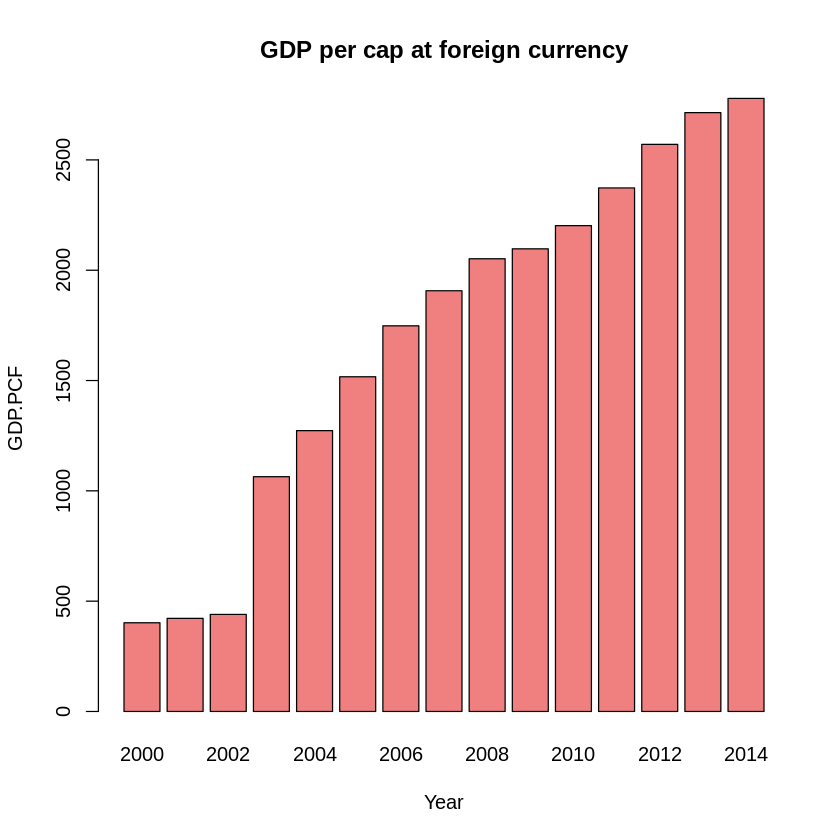

In [ ]:
barplot(GDP.PCF ~ Year, df, col = "lightcoral", main = "GDP per cap at foreign currency")

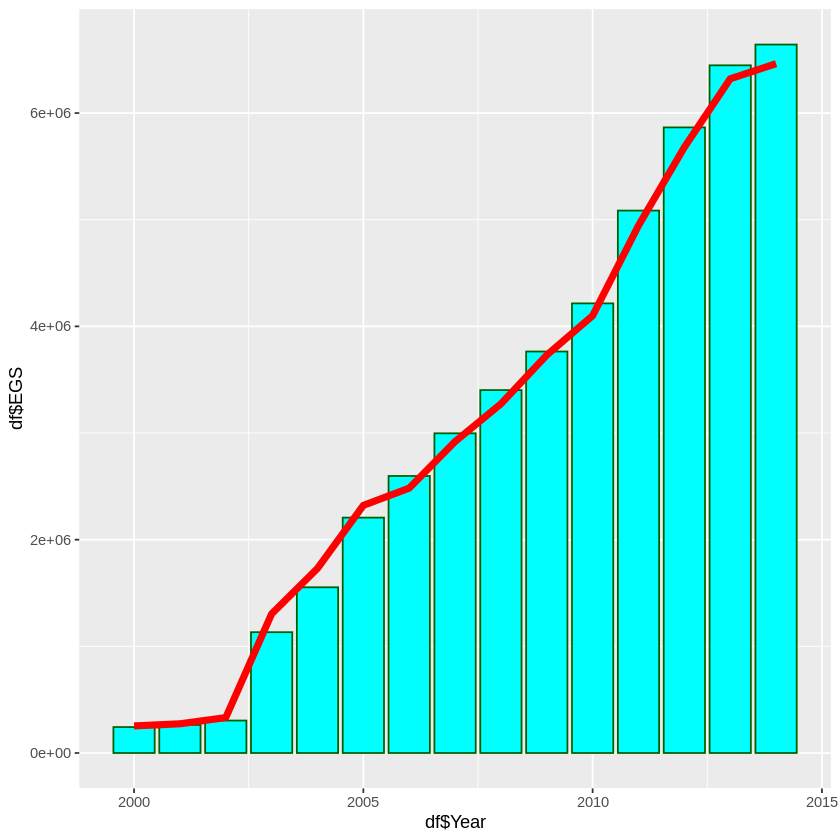

In [ ]:
data <- data.frame(df$Year, df$EGS, df$IGS)
# Plotting Charts and adding a secondary axis
ggplot(data)  + 
  geom_bar(aes(x=df$Year, y=df$EGS),stat="identity", fill="cyan",colour="#006000")+
  geom_line(aes(x=df$Year, y=df$IGS),stat="identity",color="red",size=2)

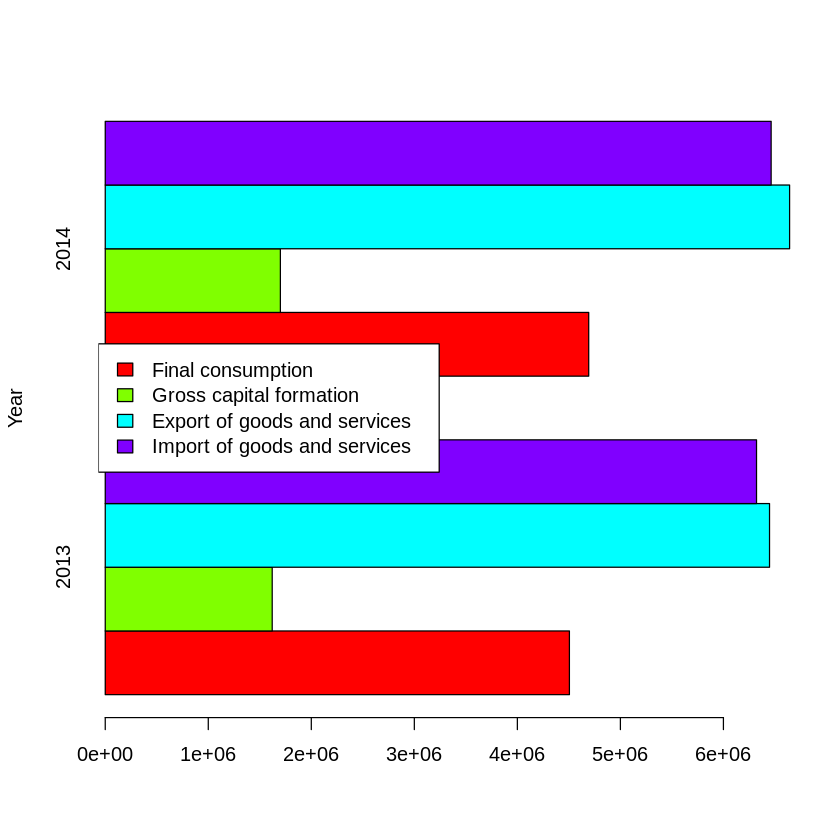

In [ ]:
barplot(cbind(FC, GCF, EGS, IGS) ~ Year, df[14:15,], beside = TRUE, horiz=TRUE, col = rainbow(4))
legend("left" ,c("Final consumption", "Gross capital formation", "Export of goods and services", "Import of goods and services"), fill = rainbow(4))

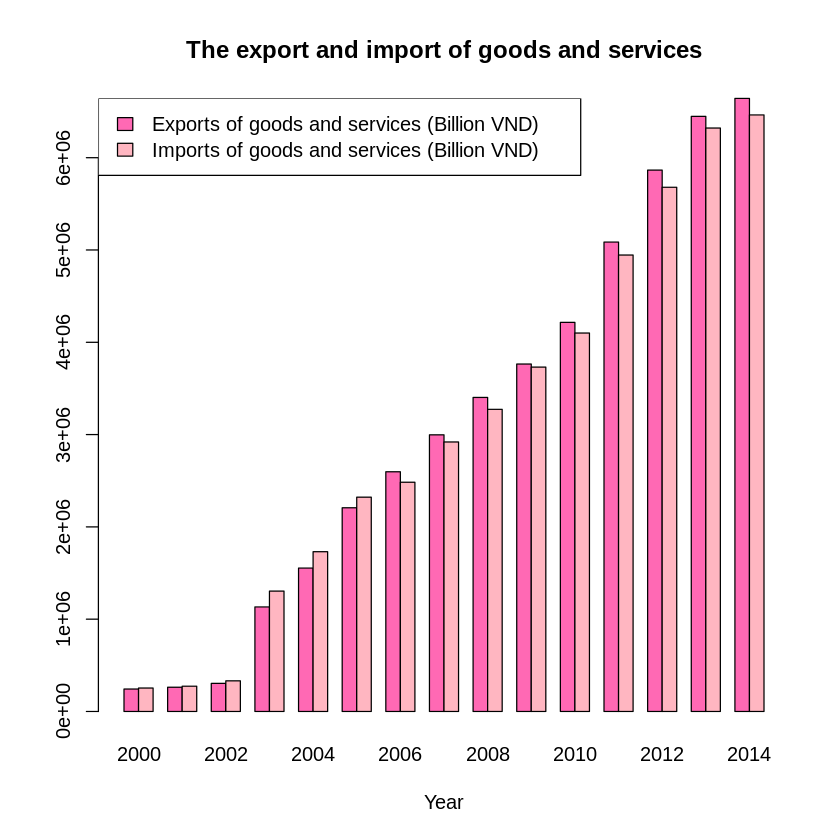

In [ ]:
barplot(cbind(EGS, IGS) ~ Year, df, beside = TRUE, col = c("hotpink","lightpink"), main = "The export and import of goods and services")
legend("topleft", c("Exports of goods and services (Billion VND)", "Imports of goods and services (Billion VND)"), fill = c("hotpink","lightpink"))

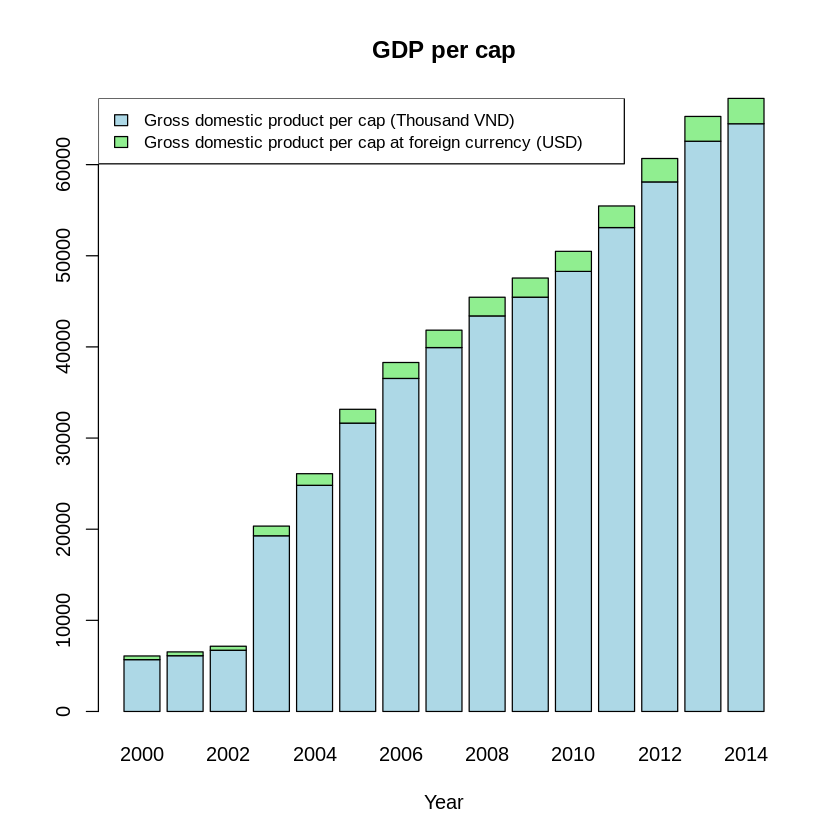

In [ ]:
barplot(cbind(GDP.PC, GDP.PCF) ~ Year, df, col = c("lightblue","lightgreen"), main = "GDP per cap")
legend("topleft", c("Gross domestic product per cap (Thousand VND)", "Gross domestic product per cap at foreign currency (USD)"), fill = c("lightblue","lightgreen"), cex = 0.85)

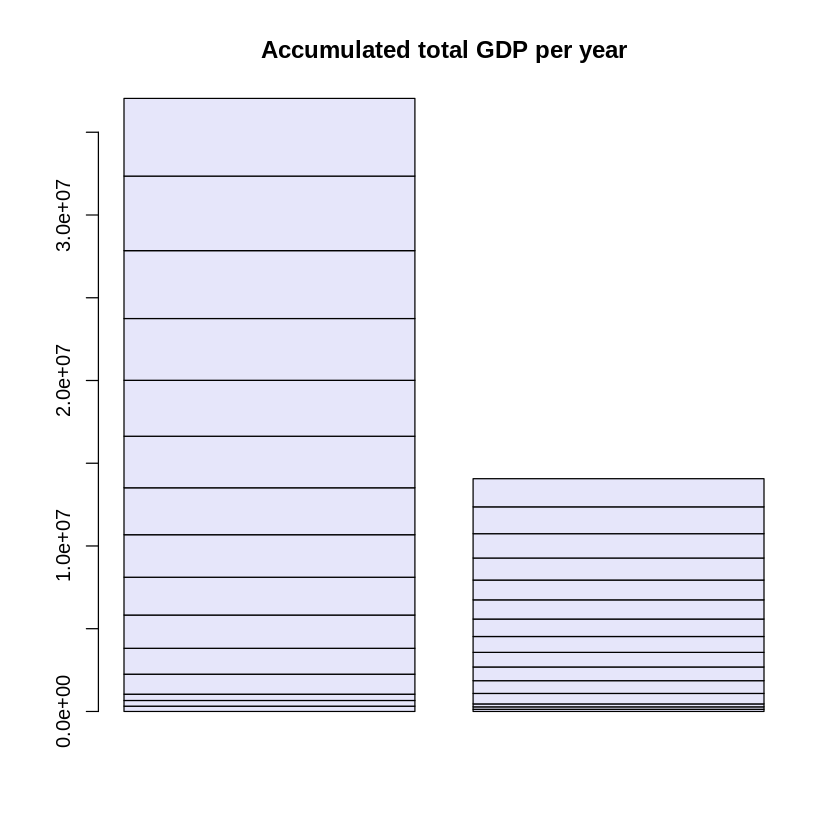

In [ ]:
barplot(cbind(df$FC, df$GCF), col = "lavender", main = "Accumulated total GDP per year")

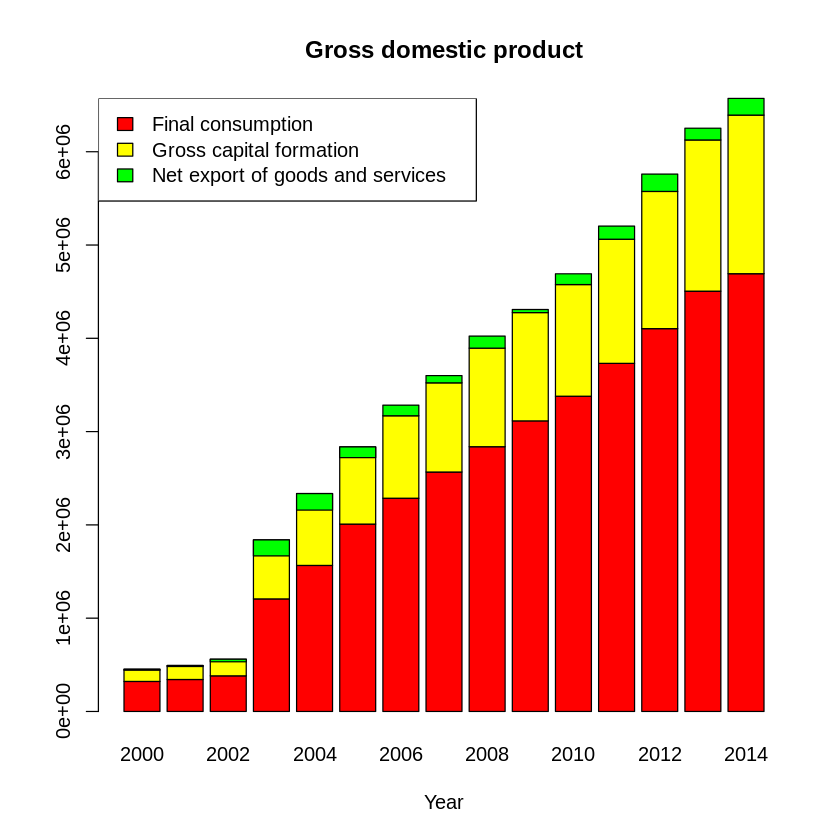

In [ ]:
barplot(cbind(FC, GCF, EGS - IGS) ~ Year, df, col = c("red", "yellow", "green"), main = "Gross domestic product")
legend("topleft", c("Final consumption", "Gross capital formation", "Net export of goods and services"), fill = c("red", "yellow", "green"))

#Biểu đồ tròn

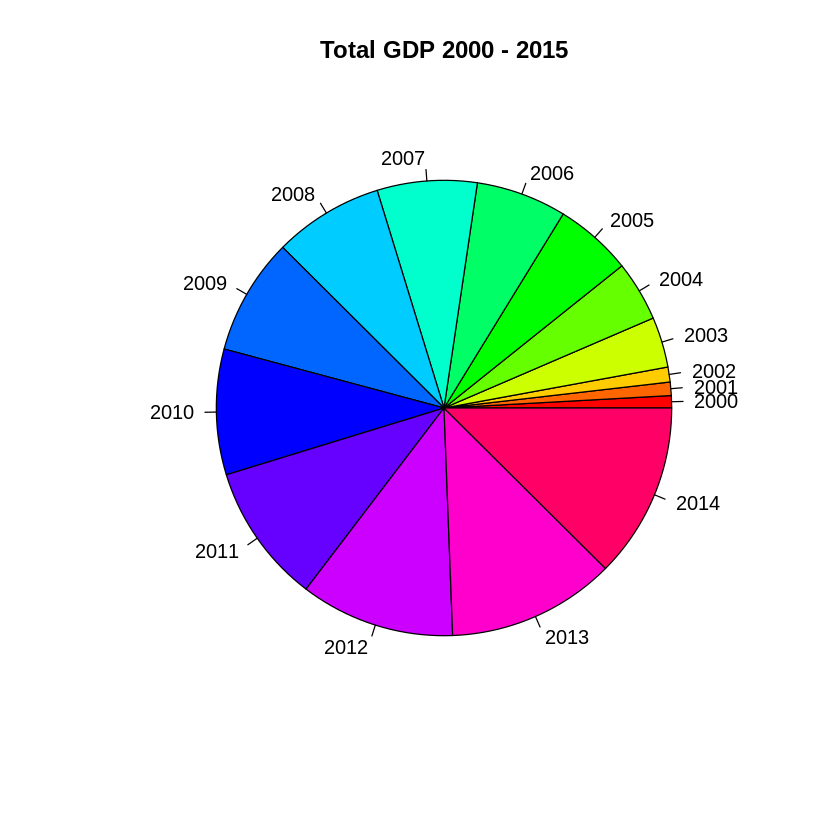

In [ ]:
pie(df$Total.GDP, labels = df$Year, col = rainbow(15), main = "Total GDP 2000 - 2015")

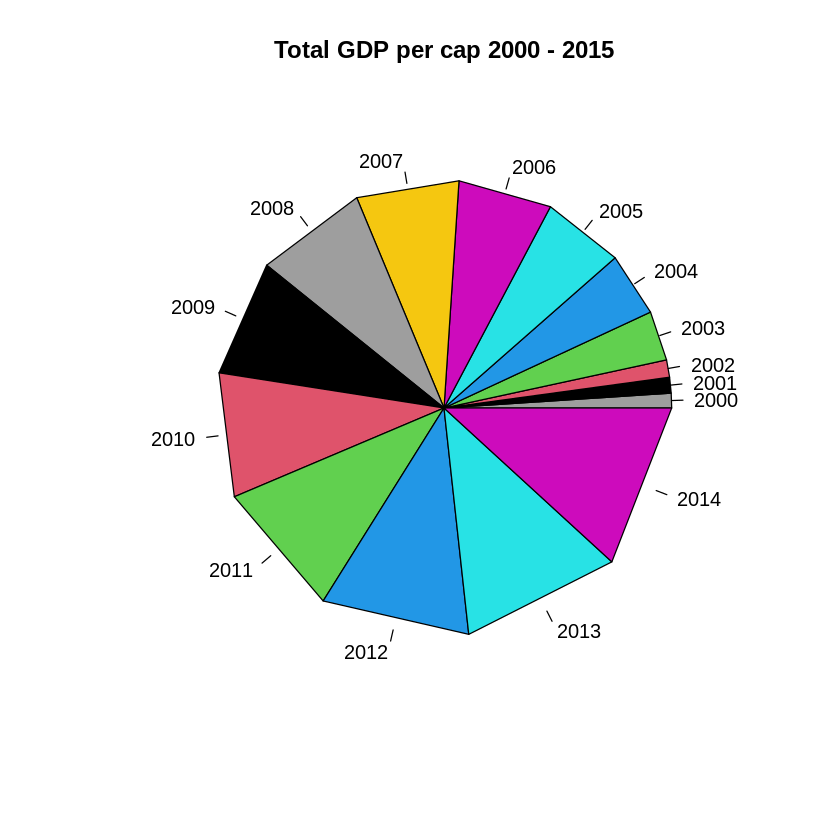

In [ ]:
pie(df$GDP.PC, labels = df$Year, col = df$Year, main = "Total GDP per cap 2000 - 2015", edges = 20)

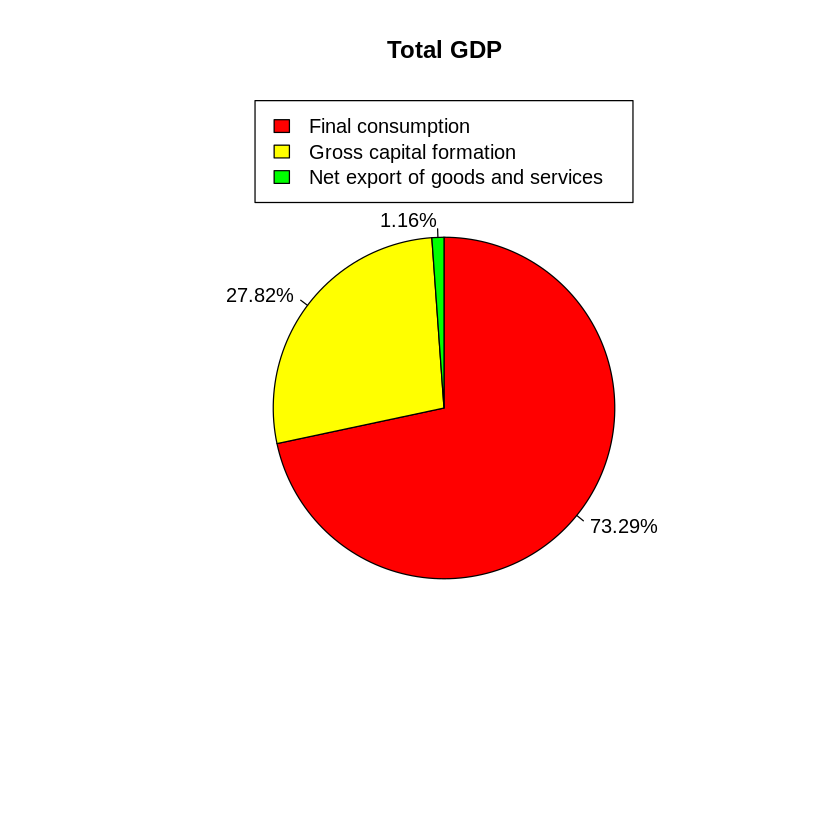

In [ ]:
pie(c(sum(df$FC), sum(df$GCF), sum(df$EGS-df$IGS)), labels = percent(c(sum(df$FC), sum(df$GCF), sum(df$EGS-df$IGS))/sum(df$Total.GDP), 0.01), col = c("red", "yellow", "green"), main = "Total GDP", clockwise = TRUE, radius = .6)
legend("top", c("Final consumption", "Gross capital formation", "Net export of goods and services"), fill = c("red", "yellow", "green"))

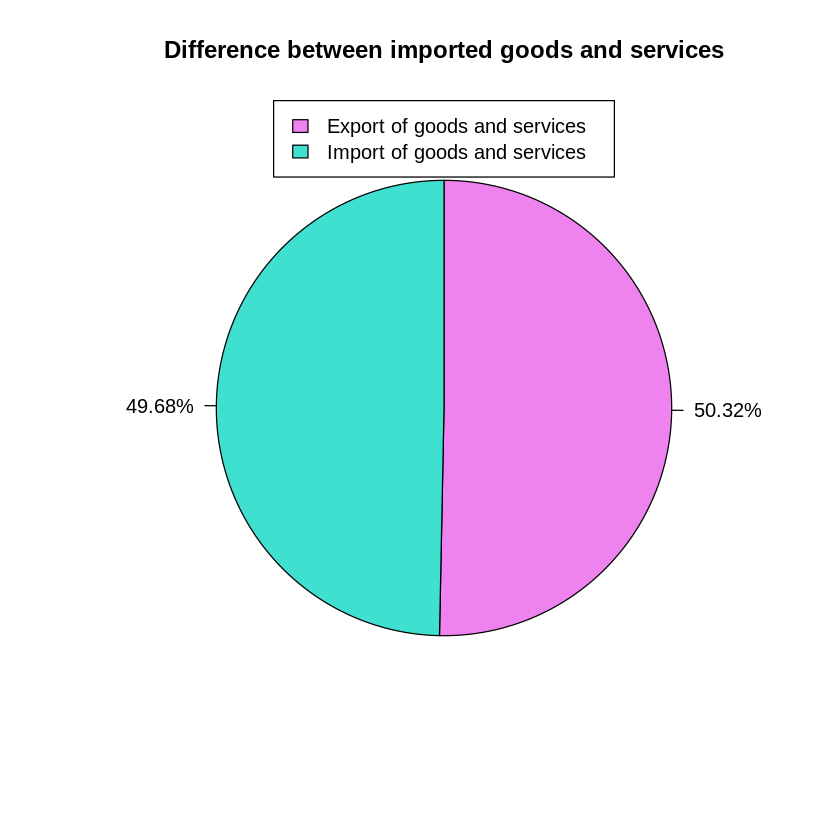

In [ ]:
pie(c(sum(df$EGS), sum(df$IGS)), labels = percent(c(sum(df$EGS), sum(df$IGS))/sum(df$EGS+df$IGS), 0.01), col = c("violet", "turquoise"), main = "Difference between imported goods and services", clockwise = TRUE, radius = .8)
legend("top", c("Export of goods and services", "Import of goods and services"), fill = c("violet", "turquoise"))

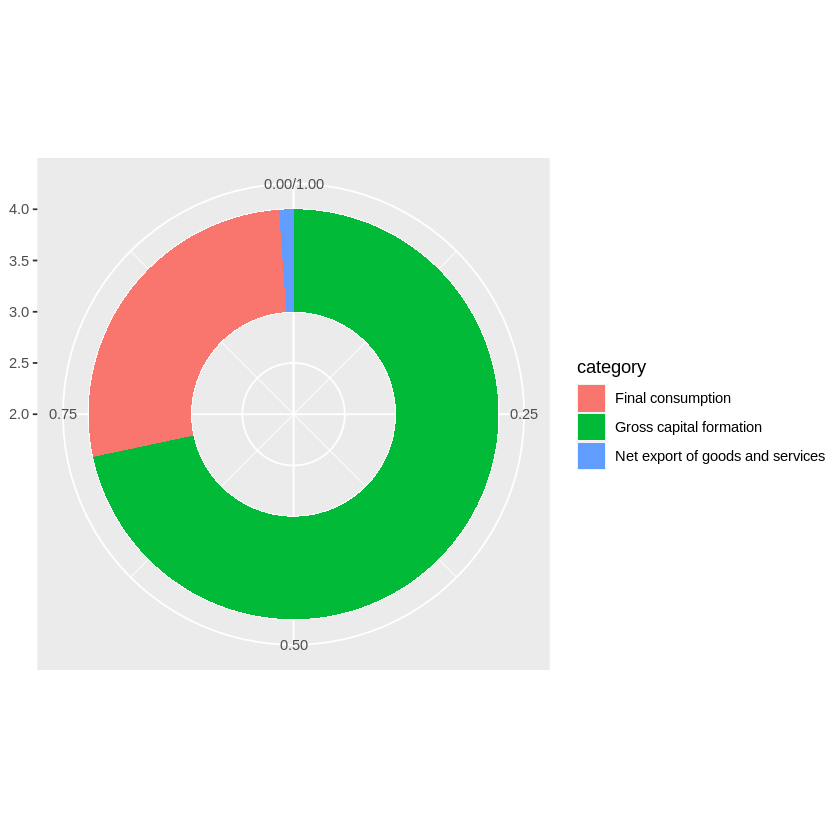

In [ ]:
data = data.frame(count =c(sum(df$FC), sum(df$GCF), sum(df$EGS-df$IGS)), category=c("Gross capital formation","Final consumption", "Net export of goods and services"))
data$fraction = data$count / sum(data$count)
# Compute the cumulative percentages (top of each rectangle)
data$ymax = cumsum(data$fraction)
# Compute the bottom of each rectangle
data$ymin = c(0, head(data$ymax, n=-1))
# Make the plot
ggplot(data, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=category)) +
     geom_rect() +
     coord_polar(theta="y") + # Try to remove that to understand how the chart is built initially
     xlim(c(2, 4)) # Try to remove that to see how to make a pie chart

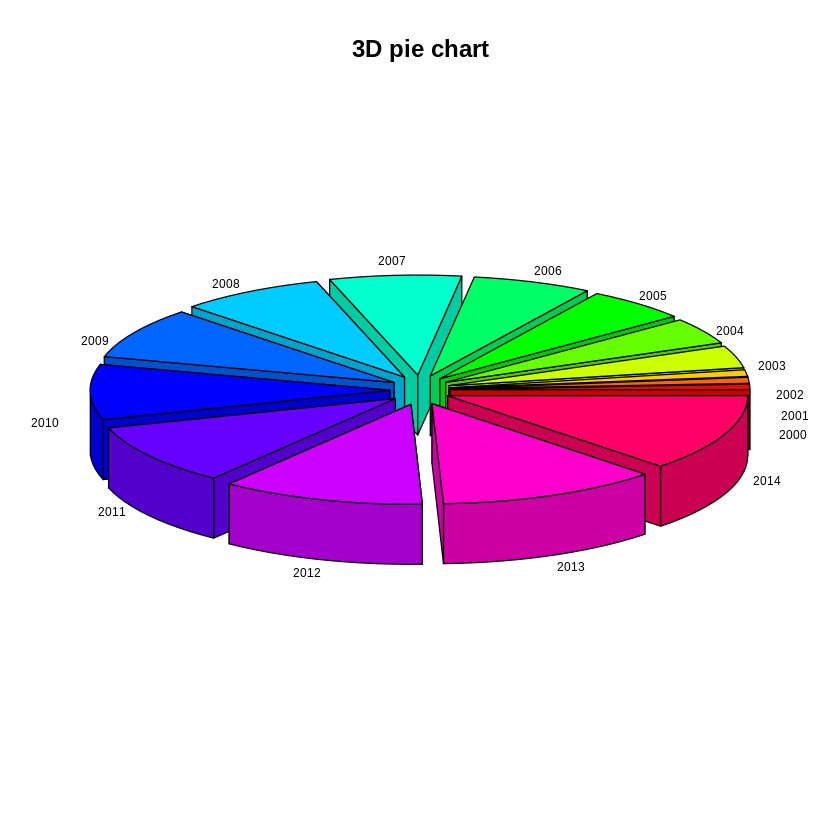

In [ ]:
pie3D(df$Total.GDP, labels = df$Year, explode = 0.1, main = "3D pie chart", labelcex = 0.6)

#Biểu đồ đường

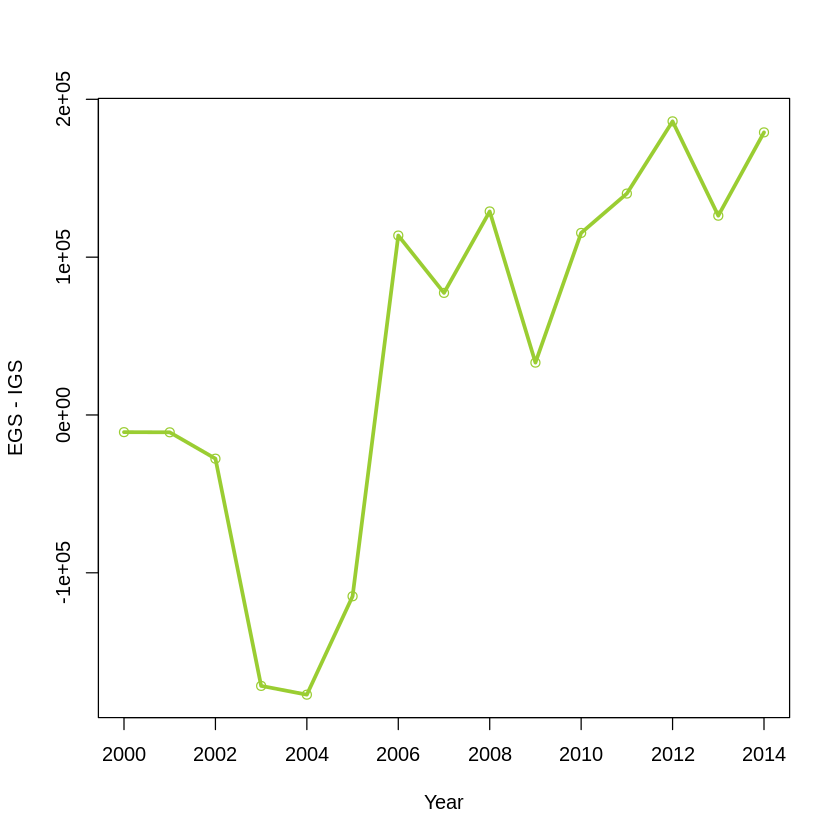

In [ ]:
plot(EGS - IGS ~ Year, df, col = "yellowgreen")
lines(EGS - IGS ~ Year, df, col = "yellowgreen", lwd = 3)

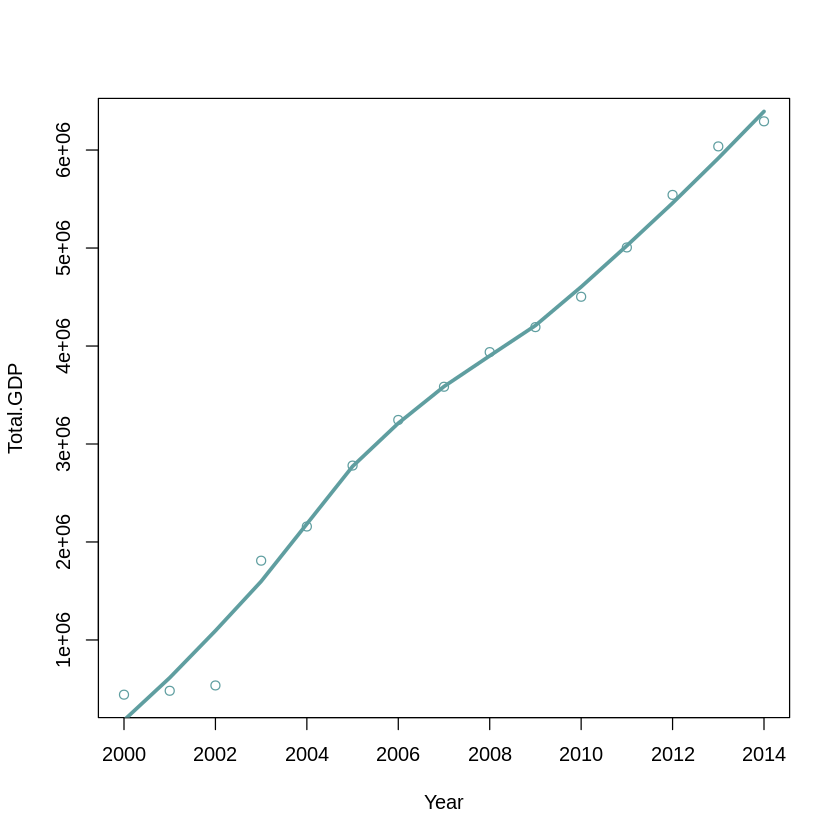

In [ ]:
plot(Total.GDP ~ Year, df, col = "cadetblue")
lines(df$Year, fitted(loess(Total.GDP ~ Year, df)), col = "cadetblue", lwd = 3)

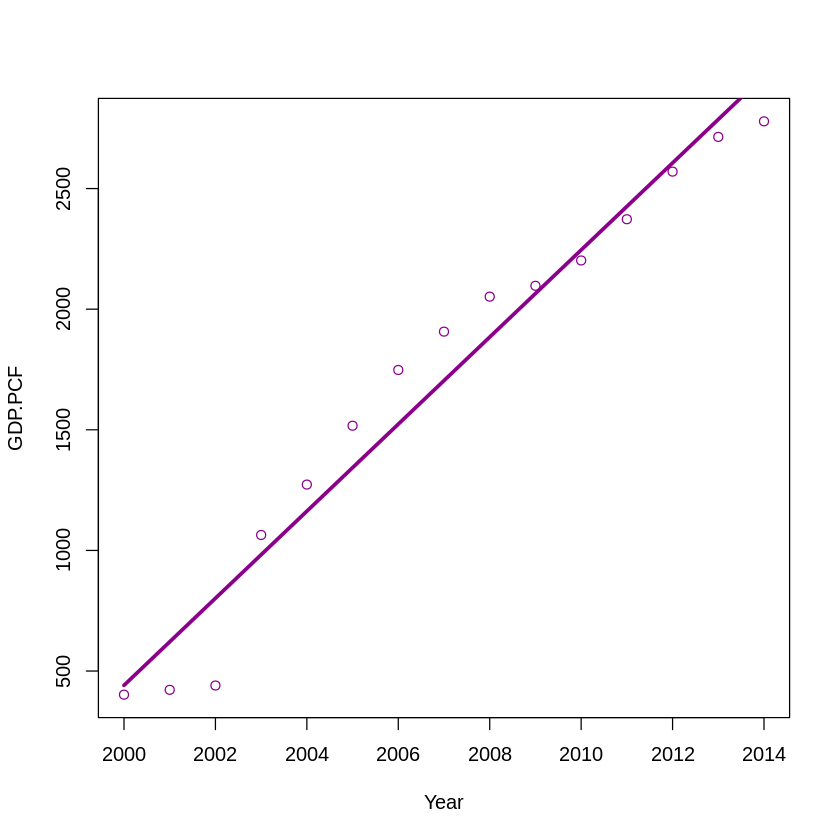

In [ ]:
plot(GDP.PCF ~ Year, df, col = "darkmagenta")
lines(df$Year, fitted(lm(GDP.PCF ~ Year, df)), col = "darkmagenta", lwd = 3)

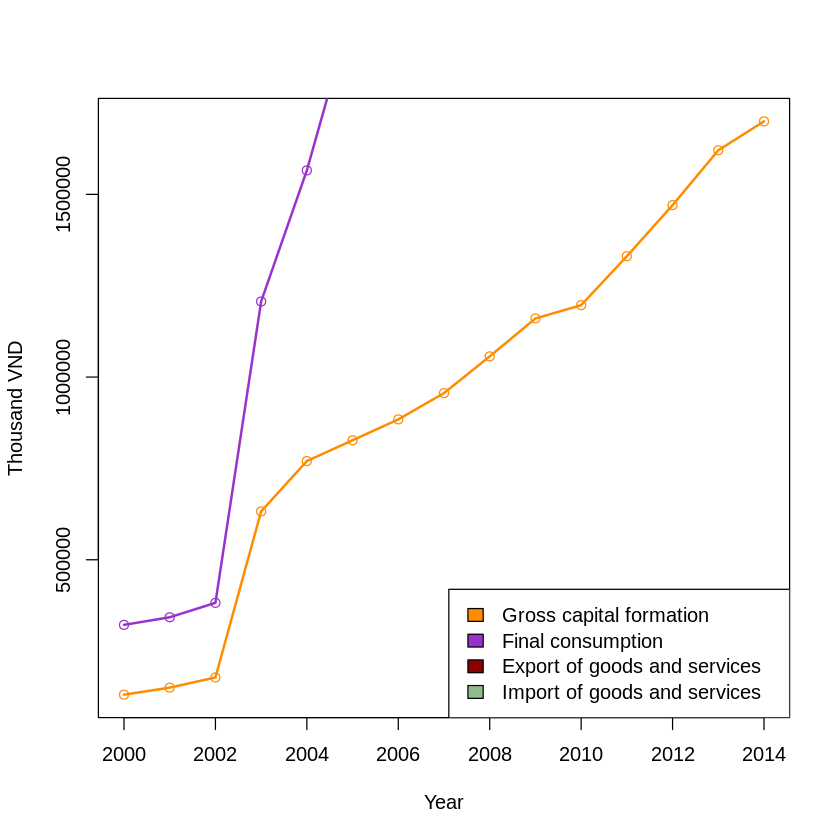

In [ ]:
plot(GCF ~ Year, df, col = "darkorange", ylab = "Thousand VND")
lines(GCF ~ Year, df, col = "darkorange", lwd = 2)
points(FC ~ Year, df, col = "darkorchid")
lines(FC ~ Year, df, col = "darkorchid", lwd = 2)
points(EGS ~ Year, df, col = "darkred")
lines(EGS ~ Year, df, col = "darkred", lwd = 2)
points(IGS ~ Year, df, col = "darkseagreen")
lines(IGS ~ Year, df, col = "darkseagreen", lwd = 2)
legend("bottomright", c("Gross capital formation","Final consumption", "Export of goods and services", "Import of goods and services"), fill = c("darkorange",  "darkorchid", "darkred", "darkseagreen"))

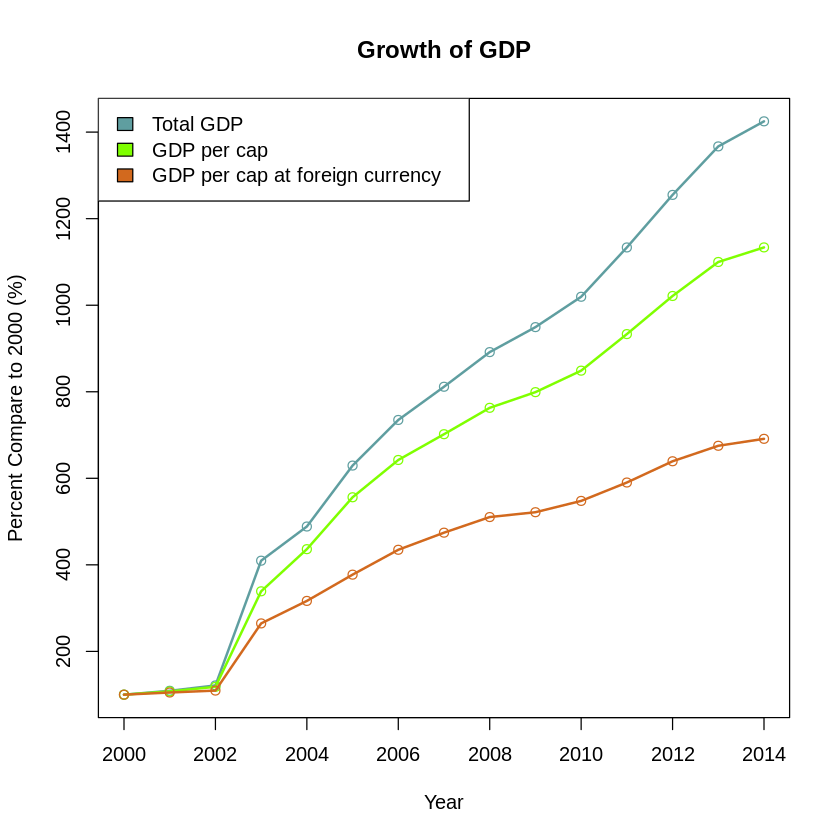

In [ ]:
plot(Total.GDP*100/min(Total.GDP) ~ Year, df, col = "cadetblue", main = "Growth of GDP", ylab = "Percent Compare to 2000 (%)")
lines(Total.GDP*100/min(Total.GDP) ~ Year, df, col = "cadetblue", lwd = 2)
points(GDP.PC*100/min(GDP.PC) ~ Year, df, col = "chartreuse")
lines(GDP.PC*100/min(GDP.PC) ~ Year, df, col = "chartreuse", lwd = 2)
points(GDP.PCF*100/min(GDP.PCF) ~ Year, df, col = "chocolate")
lines(GDP.PCF*100/min(GDP.PCF) ~ Year, df, col = "chocolate", lwd = 2)
legend("topleft" ,c("Total GDP", "GDP per cap", "GDP per cap at foreign currency"), fill = c("cadetblue",  "chartreuse", "chocolate"))

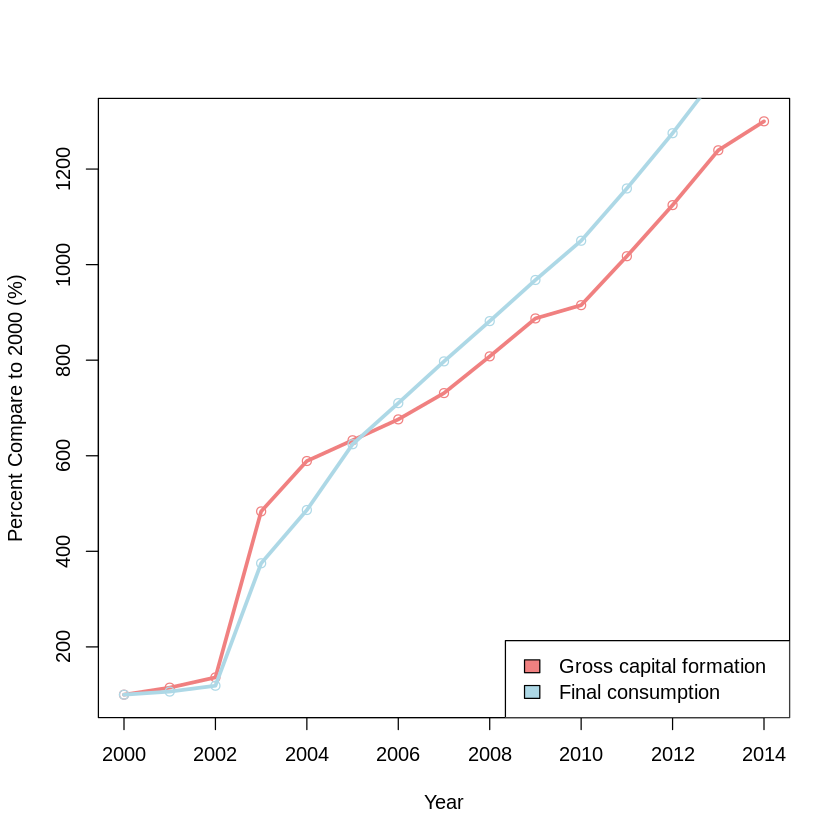

In [ ]:
plot(GCF*100/min(GCF) ~ Year, df, col = "lightcoral", ylab = "Percent Compare to 2000 (%)")
lines(GCF*100/min(GCF) ~ Year, df, col = "lightcoral", lwd = 3)
points(FC*100/min(FC) ~ Year, df, col = "lightblue")
lines(FC*100/min(FC) ~ Year, df, col = "lightblue", lwd = 3)
legend("bottomright" ,c("Gross capital formation","Final consumption"), fill = c("lightcoral", "lightblue"))

#Biểu đồ miền

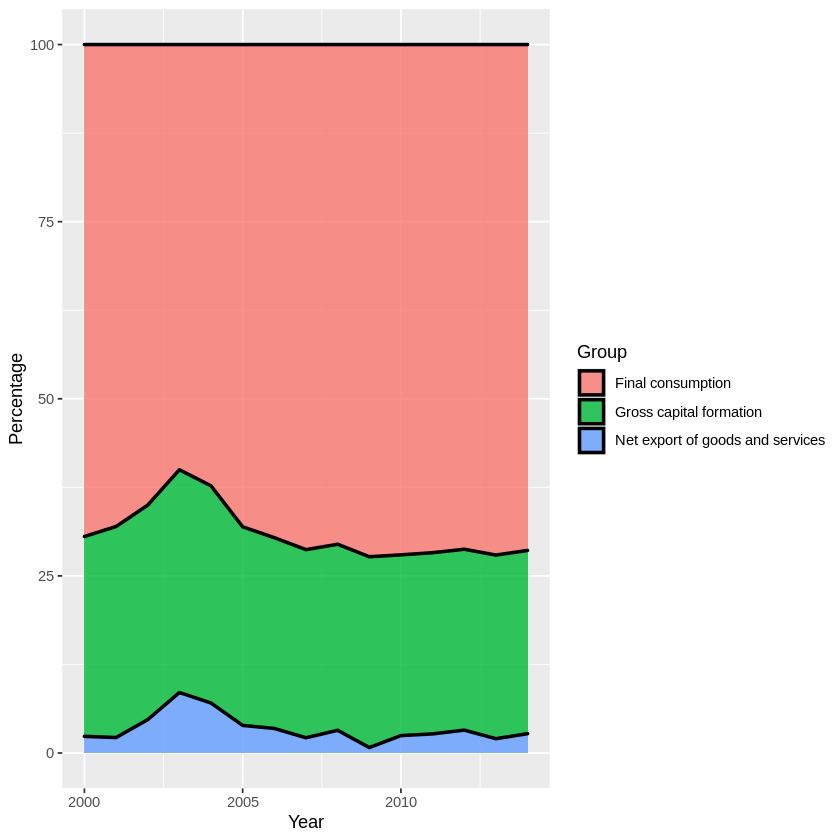

In [ ]:
Year = rep(df$Year,times=3)
Value = c(df$GCF, df$FC, abs(df$EGS - df$IGS))
Group = rep(c("Gross capital formation","Final consumption", "Net export of goods and services"),each=15)
dataarea = data.frame(Year, Value, Group)
dataarea = dataarea  %>% group_by(Year, Group) %>%  summarise(N = sum(Value)) %>% mutate(Percentage = N *100 / sum(N))
options(warn=-1)
ggplot(dataarea, aes(x=Year, y=Percentage, fill=Group)) +  geom_area(alpha=0.8 , size=1, colour="black")
options(warn=0)

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


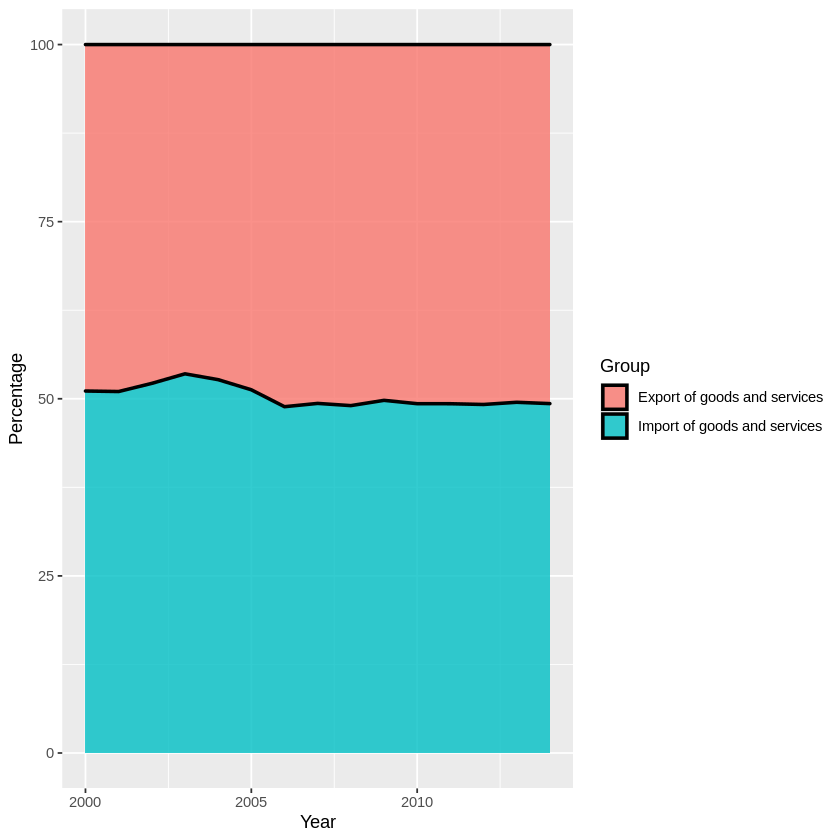

In [ ]:
Year = rep(df$Year,times=2)
Value = c(df$EGS, df$IGS)
Group = rep(c("Export of goods and services","Import of goods and services"),each=15)
dt = data.frame(Year, Value, Group)
dt = dt  %>% group_by(Year, Group) %>%  summarise(N = sum(Value)) %>% mutate(Percentage = N *100 / sum(N))
options(warn=-1)
ggplot(dt, aes(x=Year, y=Percentage, fill=Group)) +  geom_area(alpha=0.8 , size=1, colour="black")
options(warn=0)

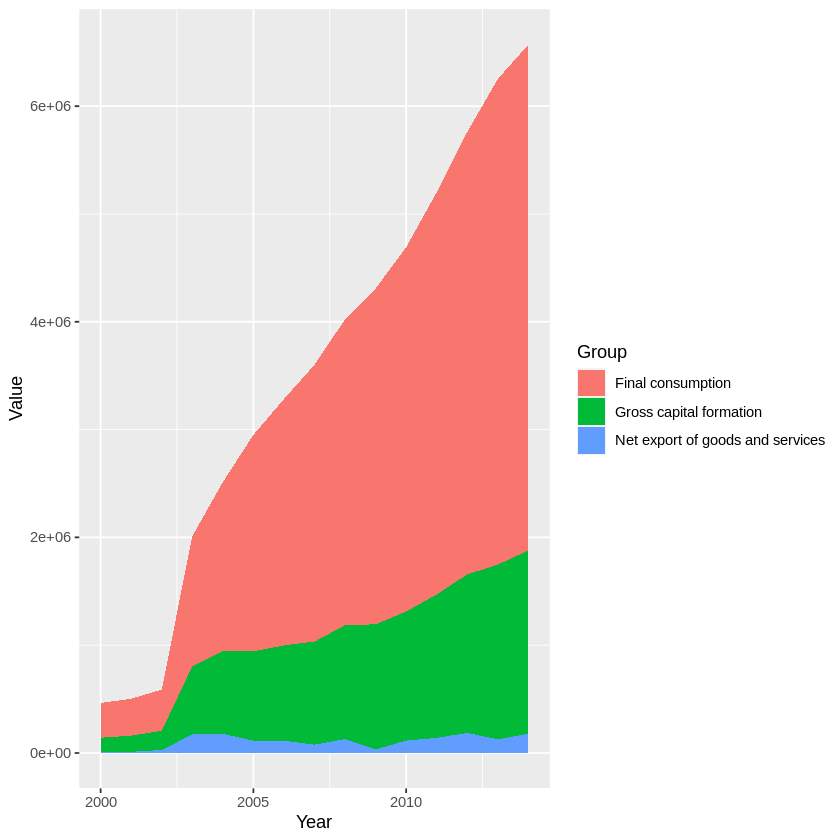

In [ ]:
Year = rep(df$Year,times=3)
Value = c(df$GCF, df$FC, abs(df$EGS - df$IGS))
Group = rep(c("Gross capital formation","Final consumption", "Net export of goods and services"),each=15)
dataarea = data.frame(Year, Value, Group)
ggplot(dataarea, aes(x=Year, y=Value, fill=Group)) + geom_area()

#Các biểu đồ khác

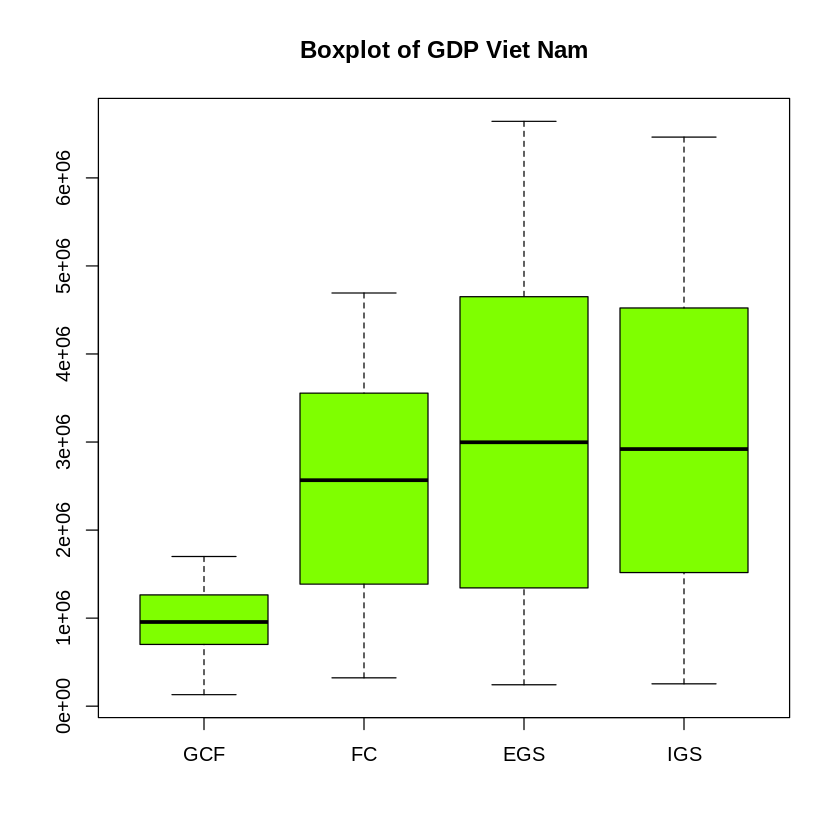

In [ ]:
boxplot(df[,5:8], col = "chartreuse", main = "Boxplot of GDP Viet Nam")

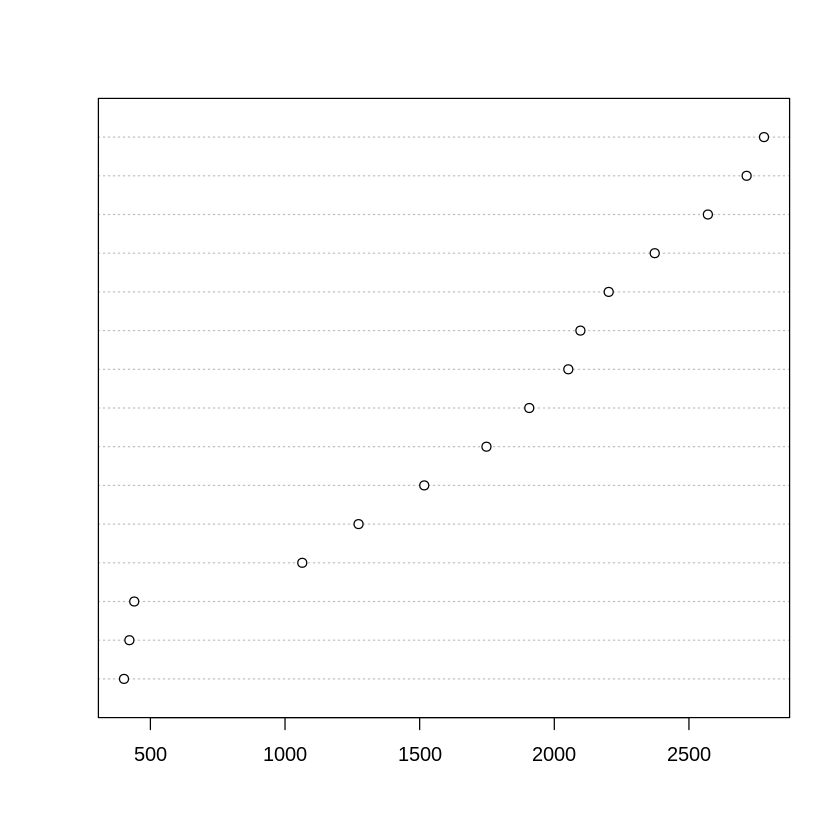

In [ ]:
dotchart(df$GDP.PCF)

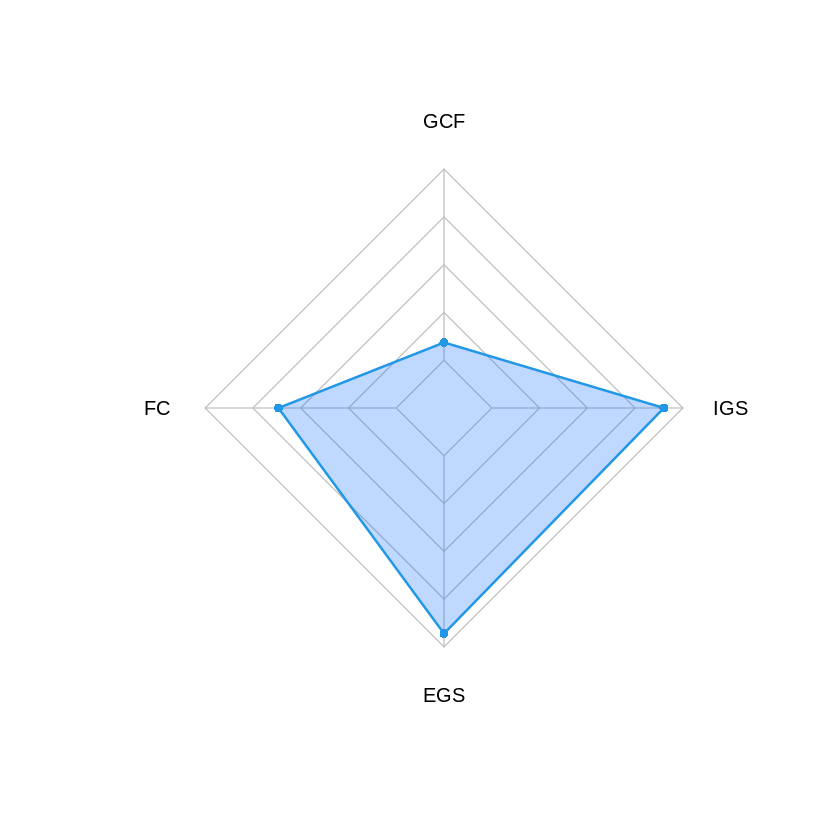

In [ ]:
radata = colSums(df[11:15,5:8])
# colnames(radata) <- c("GCF", "FC", "EGS", "IGS")
radata = data.frame(rbind(rep(30000000,4) , rep(5000000,4) , radata))
radarchart(radata, cglty = 1, cglcol = "gray", pcol = 4, plwd = 2, pfcol = rgb(0, 0.4, 1, 0.25))

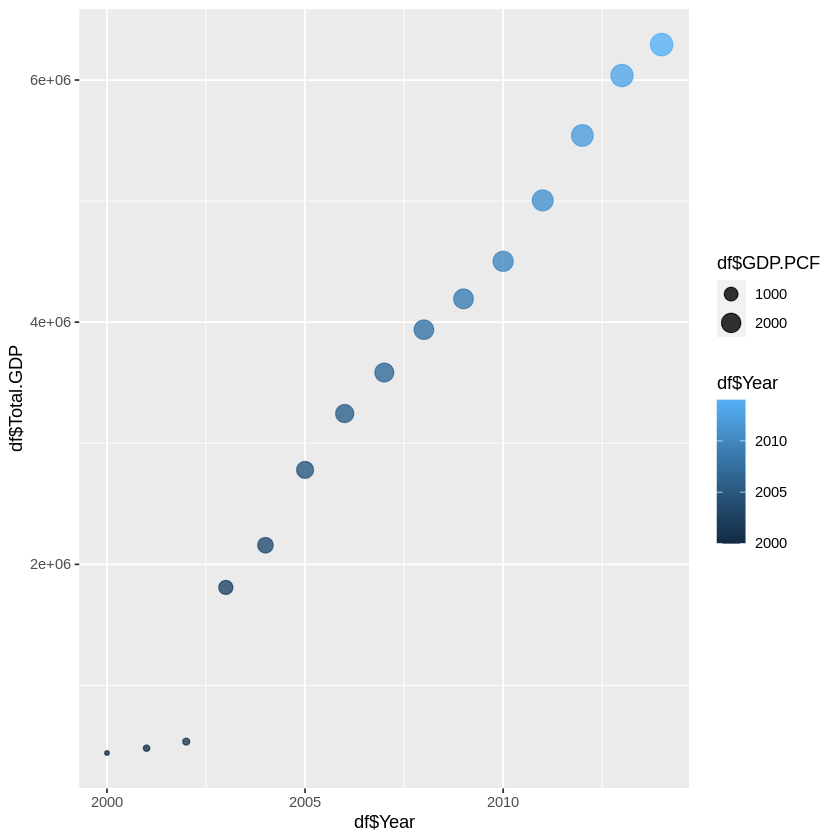

In [ ]:
databb <- data.frame(df$Year, df$Total.GDP, df$GDP.PCF)  
ggplot(databb, aes(x = df$Year, y = df$Total.GDP, size = df$GDP.PCF, color = df$Year))+ geom_point(alpha = 0.8)

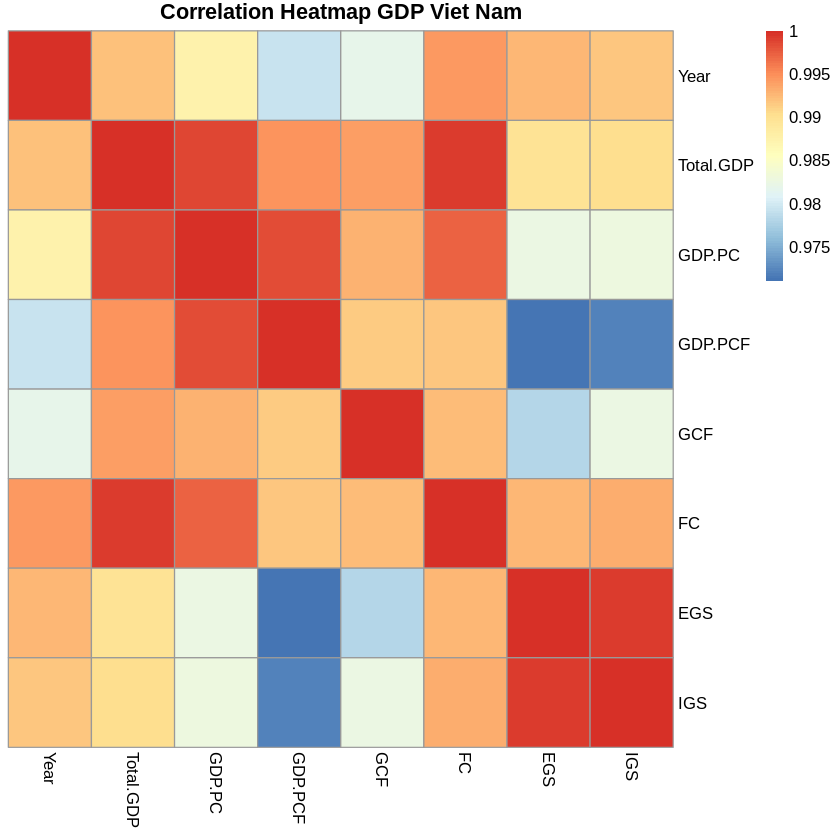

In [ ]:
pheatmap(cor(df), main="Correlation Heatmap GDP Viet Nam", cluster_cols=F, cluster_rows=F,)

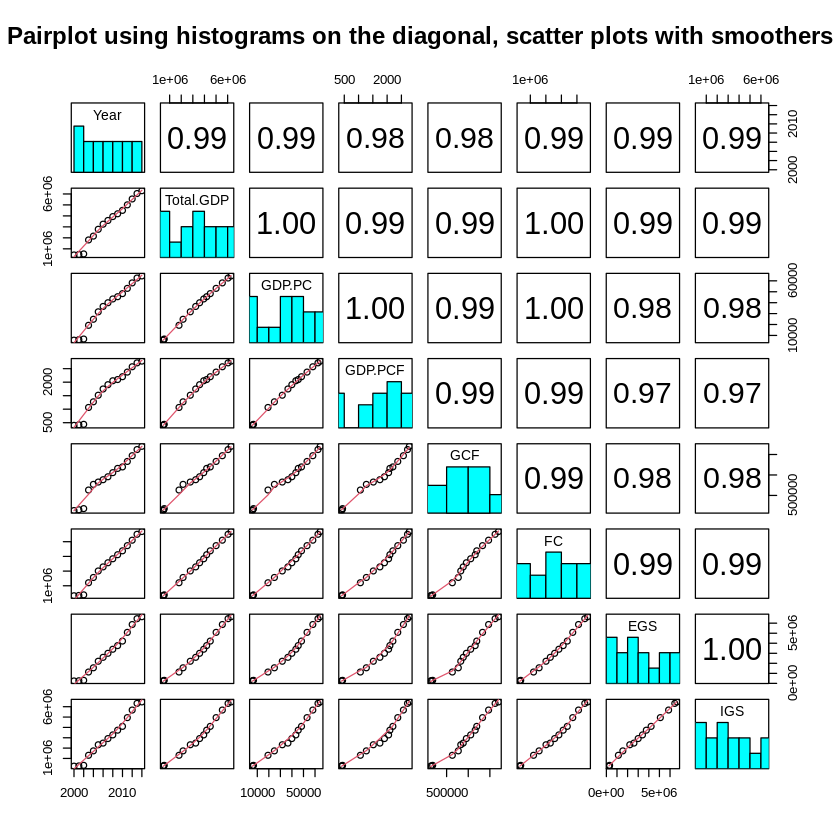

In [ ]:
# Pair plot
options(warn=-1)
panel.hist <- function(x, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}

panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
}

pairs(df, pch=1, diag.panel = panel.hist, lower.panel = panel.smooth, upper.panel = panel.cor, main = "Pairplot using histograms on the diagonal, scatter plots with smoothers")
options(warn=0)